<a href="https://colab.research.google.com/github/pauloalexx/ML_Studying/blob/main/API_BCB-An%C3%A1lise_Financeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

# API

In [5]:
# Criar função para pegar vários códigos de uma única vez e montar df com base na data

def consulta_bcb(codigo_bcb):
        url = ('https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json').format(codigo_bcb)
        df_ax = pd.read_json(url)
        df_ax.data = pd.to_datetime(df_ax['data']).dt.strftime('%Y-%m') # extraindo mês e ano da coluna data
        df_ax.set_index('data', inplace=True)
        return df_ax

# Análise de Dados

In [6]:
selic = consulta_bcb(codigo_bcb='11')
meta_selic = consulta_bcb(codigo_bcb='432')
ipca = consulta_bcb(codigo_bcb='433')
cdi = consulta_bcb(codigo_bcb='12')

<ipython-input-5-cf6c479f59d6>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ax.data = pd.to_datetime(df_ax['data']).dt.strftime('%Y-%m') # extraindo mês e ano da coluna data
<ipython-input-5-cf6c479f59d6>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ax.data = pd.to_datetime(df_ax['data']).dt.strftime('%Y-%m') # extraindo mês e ano da coluna data
<ipython-input-5-cf6c479f59d6>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ax.data = pd.to_datetime(df_ax['data']).dt.strftime('%Y-%m') # extraindo mês e ano da coluna data


In [7]:
df = selic.merge(meta_selic, how='outer', left_index=True, right_index=True ,suffixes=('selic','meta'))
df = df.merge(ipca, how='outer', left_index=True, right_index=True, suffixes='ipca')
df = df.merge(cdi, how='outer', left_index=True, right_index=True )

<ipython-input-7-ee683dff37dc>:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df = df.merge(ipca, how='outer', left_index=True, right_index=True, suffixes='ipca')


In [8]:
df.head()

,valorselic,valormeta,valor_x,valor_y
data,,,,
1980-01,NaN,NaN,6.62,NaN
1980-01,NaN,NaN,4.62,NaN
1980-01,NaN,NaN,6.04,NaN
1980-01,NaN,NaN,5.29,NaN
1980-01,NaN,NaN,5.70,NaN


In [9]:
columns = {'valorselic':'selic', 'valormeta':'meta_selic','valor_x':'ipca','valor_y':'cdi'}
df = df.rename(columns=columns)
df = df.sort_values(by='data')

In [ ]:
# df.set_index(keys='data', inplace=True)
# df.head()

<Axes: xlabel='data', ylabel='meta_selic'>

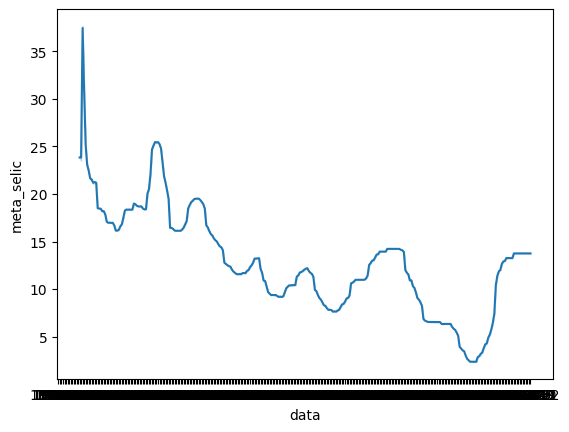

In [13]:
sns.lineplot(data=df['meta_selic'])

In [ ]:
df.head()

,valor
data,
04/06/1986,0.065041
05/06/1986,0.067397
06/06/1986,0.066740
09/06/1986,0.068247
10/06/1986,0.067041
